# Занятие 5

Библиотека sqlite3 (продолжение). Типы операторов SQL.
Написание сложных запросов к базам данных при помощи библиотеки sqlite3.


In [1]:
import pandas as pd
import numpy as np
import sqlite3

Создать базу данных в Python с помощью SQLite можно несколькими способами. Для этого используется объект Connection, который и представляет собой базу. Он создается с помощью функции connect().

Создадим файл .db, поскольку это стандартный способ управления базой SQLite. Файл будет называться orders.db. За соединение будет отвечать переменная conn.

In [ ]:
conn = sqlite3.connect('orders.db')

Перед строкой с путем стоит символ «r», так как речь идет о «сырой» строке, где символы «/» не отвечают за экранирование.

In [ ]:
conn = sqlite3.connect(':memory:')

In [ ]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [ ]:
connection = create_connection("SQL_s_50.db")

Connection to SQLite DB successful


После создания объекта соединения с базой данных нужно создать объект cursor. Он позволяет делать SQL-запросы к базе. Используем переменную cur для хранения объекта:

In [ ]:
cur = connection.cursor()

Выполняем SQL-запрос используя метод .execute():

In [ ]:
cur.execute("""CREATE TABLE IF NOT EXISTS users(
   userid INT PRIMARY KEY,
   fname TEXT,
   lname TEXT,
   gender TEXT);
""")
conn.commit()

In [ ]:
cur.execute("""CREATE TABLE IF NOT EXISTS orders(
   orderid INT PRIMARY KEY,
   date TEXT,
   userid TEXT,
   total TEXT);
""")
conn.commit()

Теперь в базе данных две таблицы.

In [ ]:
users = [('00003', 'Peter', 'Parker', 'Male'), ('00004', 'Bruce', 'Wayne', 'male')]

SQLite ожидает получить значения в формате кортежа. Однако в переменной может быть и список с набором кортежей. Таким образом можно добавить несколько пользователей. В этом случае нужно использовать метод .executemany().

In [ ]:
cur.executemany("INSERT INTO users VALUES(?, ?, ?, ?);", users)
conn.commit()

In [ ]:
customers = [
  ('00005', 'Stephanie', 'Stewart', 'female'), ('00006', 'Sincere', 'Sherman', 'female'), ('00007', 'Sidney', 'Horn', 'male'),
  ('00008', 'Litzy', 'Yates', 'female'), ('00009', 'Jaxon', 'Mills', 'male'), ('00010', 'Paul', 'Richard', 'male'),
  ('00011', 'Kamari', 'Holden', 'female'), ('00012', 'Gaige', 'Summers', 'female'), ('00013', 'Andrea', 'Snow', 'female'),
  ('00014', 'Angelica', 'Barnes', 'female'), ('00015', 'Leah', 'Pitts', 'female'), ('00016', 'Dillan', 'Olsen', 'male'),
  ('00017', 'Joe', 'Walsh', 'male'), ('00018', 'Reagan', 'Cooper', 'male'), ('00019', 'Aubree', 'Hogan', 'female'),
  ('00020', 'Avery', 'Floyd', 'male'), ('00021', 'Elianna', 'Simmons', 'female'), ('00022', 'Rodney', 'Stout', 'male'),
  ('00023', 'Elaine', 'Mcintosh', 'female'), ('00024', 'Myla', 'Mckenzie', 'female'), ('00025', 'Alijah', 'Horn', 'female'),
  ('00026', 'Rohan', 'Peterson', 'male'), ('00027', 'Irene', 'Walters', 'female'), ('00028', 'Lilia', 'Sellers', 'female'),
  ('00029', 'Perla', 'Jefferson', 'female'), ('00030', 'Ashley', 'Klein', 'female')
]
orders = [
  ('00001', '2020-01-01', '00025', '178'), ('00002', '2020-01-03', '00025', '39'), ('00003', '2020-01-07', '00016', '153'),
  ('00004', '2020-01-10', '00015', '110'), ('00005', '2020-01-11', '00024', '219'), ('00006', '2020-01-12', '00029', '37'),
  ('00007', '2020-01-14', '00028', '227'), ('00008', '2020-01-18', '00010', '232'), ('00009', '2020-01-22', '00016', '236'),
  ('00010', '2020-01-26', '00017', '116'), ('00011', '2020-01-28', '00028', '221'), ('00012', '2020-01-31', '00021', '238'),
  ('00013', '2020-02-02', '00015', '177'), ('00014', '2020-02-05', '00025', '76'), ('00015', '2020-02-08', '00022', '245'),
  ('00016', '2020-02-12', '00008', '180'), ('00017', '2020-02-14', '00020', '190'), ('00018', '2020-02-18', '00030', '166'),
  ('00019', '2020-02-22', '00002', '168'), ('00020', '2020-02-26', '00021', '174'), ('00021', '2020-02-29', '00017', '126'),
  ('00022', '2020-03-02', '00019', '211'), ('00023', '2020-03-05', '00030', '144'), ('00024', '2020-03-09', '00012', '112'),
  ('00025', '2020-03-10', '00006', '45'), ('00026', '2020-03-11', '00004', '200'), ('00027', '2020-03-14', '00015', '226'),
  ('00028', '2020-03-17', '00030', '189'), ('00029', '2020-03-20', '00004', '152'), ('00030', '2020-03-22', '00026', '239'),
  ('00031', '2020-03-23', '00012', '135'), ('00032', '2020-03-24', '00013', '211'), ('00033', '2020-03-27', '00030', '226'),
  ('00034', '2020-03-28', '00007', '173'), ('00035', '2020-03-30', '00010', '144'), ('00036', '2020-04-01', '00017', '185'),
  ('00037', '2020-04-03', '00009', '95'), ('00038', '2020-04-06', '00009', '138'), ('00039', '2020-04-10', '00025', '223'),
  ('00040', '2020-04-12', '00019', '118'), ('00041', '2020-04-15', '00024', '132'), ('00042', '2020-04-18', '00008', '238'),
  ('00043', '2020-04-21', '00003', '50'), ('00044', '2020-04-25', '00019', '98'), ('00045', '2020-04-26', '00017', '167'),
  ('00046', '2020-04-28', '00009', '215'), ('00047', '2020-05-01', '00014', '142'), ('00048', '2020-05-05', '00022', '173'),
  ('00049', '2020-05-06', '00015', '80'), ('00050', '2020-05-07', '00017', '37'), ('00051', '2020-05-08', '00002', '36'),
  ('00052', '2020-05-10', '00022', '65'), ('00053', '2020-05-14', '00019', '110'), ('00054', '2020-05-18', '00017', '36'),
  ('00055', '2020-05-21', '00008', '163'), ('00056', '2020-05-24', '00024', '91'), ('00057', '2020-05-26', '00028', '154'),
  ('00058', '2020-05-30', '00022', '130'), ('00059', '2020-05-31', '00017', '119'), ('00060', '2020-06-01', '00024', '137'),
  ('00061', '2020-06-03', '00017', '206'), ('00062', '2020-06-04', '00013', '100'), ('00063', '2020-06-05', '00021', '187'),
  ('00064', '2020-06-09', '00025', '170'), ('00065', '2020-06-11', '00011', '149'), ('00066', '2020-06-12', '00007', '195'),
  ('00067', '2020-06-14', '00015', '30'), ('00068', '2020-06-16', '00002', '246'), ('00069', '2020-06-20', '00028', '163'),
  ('00070', '2020-06-22', '00005', '184'), ('00071', '2020-06-23', '00022', '68'), ('00072', '2020-06-27', '00013', '92'),
  ('00073', '2020-06-30', '00022', '149'), ('00074', '2020-07-04', '00002', '65'), ('00075', '2020-07-05', '00017', '88'),
  ('00076', '2020-07-09', '00007', '156'), ('00077', '2020-07-13', '00010', '26'), ('00078', '2020-07-16', '00008', '55'),
  ('00079', '2020-07-20', '00019', '81'), ('00080', '2020-07-22', '00011', '78'), ('00081', '2020-07-23', '00026', '166'),
  ('00082', '2020-07-27', '00014', '65'), ('00083', '2020-07-30', '00021', '205'), ('00084', '2020-08-01', '00026', '140'),
  ('00085', '2020-08-05', '00006', '236'), ('00086', '2020-08-06', '00021', '208'), ('00087', '2020-08-07', '00021', '169'),
  ('00088', '2020-08-08', '00004', '157'), ('00089', '2020-08-11', '00017', '71'), ('00090', '2020-08-13', '00025', '89'),
  ('00091', '2020-08-16', '00014', '249'), ('00092', '2020-08-18', '00012', '59'), ('00093', '2020-08-19', '00013', '121'),
  ('00094', '2020-08-20', '00025', '179'), ('00095', '2020-08-22', '00017', '208'), ('00096', '2020-08-26', '00024', '217'),
  ('00097', '2020-08-28', '00004', '206'), ('00098', '2020-08-30', '00017', '114'), ('00099', '2020-08-31', '00017', '169'),
  ('00100', '2020-09-02', '00022', '226')
]

In [ ]:
cur.executemany("INSERT INTO users VALUES(?, ?, ?, ?);", customers)
cur.executemany("INSERT INTO orders VALUES(?, ?, ?, ?);", orders)
conn.commit()

Функции fetchone() используется для получения только одного результата, возвращаемого SQL-запросом.

In [ ]:
cur.execute("SELECT * FROM users;")
one_result = cur.fetchone()
print(one_result)

(3, 'Peter', 'Parker', 'Male')


Функция fetchmany() аозволяет вернуть несколько строк результата, возвращаемого SQL-запросом.

In [ ]:
cur.execute("SELECT * FROM users;")
three_results = cur.fetchmany(3)
print(three_results)

[(3, 'Peter', 'Parker', 'Male'), (4, 'Bruce', 'Wayne', 'male'), (5, 'Stephanie', 'Stewart', 'female')]


Функция fetchall() используется для получения всех результатов.

In [ ]:
cur.execute("SELECT * FROM users;")
all_results = cur.fetchall()
print(all_results)

[(3, 'Peter', 'Parker', 'Male'), (4, 'Bruce', 'Wayne', 'male'), (5, 'Stephanie', 'Stewart', 'female'), (6, 'Sincere', 'Sherman', 'female'), (7, 'Sidney', 'Horn', 'male'), (8, 'Litzy', 'Yates', 'female'), (9, 'Jaxon', 'Mills', 'male'), (10, 'Paul', 'Richard', 'male'), (11, 'Kamari', 'Holden', 'female'), (12, 'Gaige', 'Summers', 'female'), (13, 'Andrea', 'Snow', 'female'), (14, 'Angelica', 'Barnes', 'female'), (15, 'Leah', 'Pitts', 'female'), (16, 'Dillan', 'Olsen', 'male'), (17, 'Joe', 'Walsh', 'male'), (18, 'Reagan', 'Cooper', 'male'), (19, 'Aubree', 'Hogan', 'female'), (20, 'Avery', 'Floyd', 'male'), (21, 'Elianna', 'Simmons', 'female'), (22, 'Rodney', 'Stout', 'male'), (23, 'Elaine', 'Mcintosh', 'female'), (24, 'Myla', 'Mckenzie', 'female'), (25, 'Alijah', 'Horn', 'female'), (26, 'Rohan', 'Peterson', 'male'), (27, 'Irene', 'Walters', 'female'), (28, 'Lilia', 'Sellers', 'female'), (29, 'Perla', 'Jefferson', 'female'), (30, 'Ashley', 'Klein', 'female')]


## Объединение таблиц

**INNER JOIN** - внутреннее соединение. В результате остаются только те строки, для которых нашлось соответствие. До сих пор мы использовали только этот тип соединений.

**LEFT JOIN** - левое внешнее соединение. Работает как JOIN, но если для строки таблицы, находящейся по левую сторону ключевого слова LEFT JOIN, не нашлось ни одной строки в таблице, находящейся по правую сторону LEFT JOIN, то строка все равно добавляется в результат, а значения столбцов правой таблицы равны null.

**RIGHT JOIN** - правое внешнее соединение. Работает как JOIN, но если для строки таблицы, находящейся по правую сторону ключевого слова RIGHT JOIN, не нашлось ни одной строки в таблице, находящейся по левую сторону RIGHT JOIN, то строка все равно добавляется в результат, а значения столбцов левой таблицы равны null.

**FULL JOIN** - полное внешнее соединение. Если для какой-либо из таблиц не нашлось строки в другой таблице, то строка все равно попадает в результат, а значения столбцов другой таблицы равны null.

**CROSS JOIN** - перекрестное (или декартово) произведение. Каждая строка одной таблицы соединяется с каждой строкой второй таблицы, давая тем самым в результате все возможные сочетания строк двух таблиц. Аналогичного результата можно достичь просто перечислив таблицы в FROM через запятую.

In [ ]:
cur.execute("""SELECT *, users.fname, users.lname FROM orders
    LEFT JOIN users ON users.userid=orders.userid;""")
print(cur.fetchall())

[(1, '2020-01-01', '00025', '178', 25, 'Alijah', 'Horn', 'female', 'Alijah', 'Horn'), (2, '2020-01-03', '00025', '39', 25, 'Alijah', 'Horn', 'female', 'Alijah', 'Horn'), (3, '2020-01-07', '00016', '153', 16, 'Dillan', 'Olsen', 'male', 'Dillan', 'Olsen'), (4, '2020-01-10', '00015', '110', 15, 'Leah', 'Pitts', 'female', 'Leah', 'Pitts'), (5, '2020-01-11', '00024', '219', 24, 'Myla', 'Mckenzie', 'female', 'Myla', 'Mckenzie'), (6, '2020-01-12', '00029', '37', 29, 'Perla', 'Jefferson', 'female', 'Perla', 'Jefferson'), (7, '2020-01-14', '00028', '227', 28, 'Lilia', 'Sellers', 'female', 'Lilia', 'Sellers'), (8, '2020-01-18', '00010', '232', 10, 'Paul', 'Richard', 'male', 'Paul', 'Richard'), (9, '2020-01-22', '00016', '236', 16, 'Dillan', 'Olsen', 'male', 'Dillan', 'Olsen'), (10, '2020-01-26', '00017', '116', 17, 'Joe', 'Walsh', 'male', 'Joe', 'Walsh'), (11, '2020-01-28', '00028', '221', 28, 'Lilia', 'Sellers', 'female', 'Lilia', 'Sellers'), (12, '2020-01-31', '00021', '238', 21, 'Elianna', 'S

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine('sqlite:///SQL_s5.db', echo = False)

Метод .to_sql() записывает записи, хранящиеся в DataFrame, в базу данных SQL. Поддерживаются базы данных, поддерживаемые SQLAlchemy. Таблицы могут быть заново созданы, добавлены или перезаписаны.

Наиболее часто используемые параметры метода to_sql:

**name**: string
Имя таблицы SQL.

**con**: sqlalchemy.engine.Engine или sqlite3.Connection
Использование SQLAlchemy позволяет использовать любую БД, поддерживаемую этой библиотекой.

**schema**: string, optional
Укажите схему (если это поддерживает база данных). Если схема не указана, то будет использована схема по-умолчанию.

**if_exists**: {‘fail’, ‘replace’, ‘append’}, default ‘fail’
Параметр описывает поведение, если таблица уже существует.

fail: вызвать ошибку ValueError.

replace: Drop table перед вставкой новых значений.

append: вставить новые значения в существующую таблицу.

**index**: bool, по-умолчанию True
Запишет индекс DataFrame в виде столбца. Использует index_label в качестве имени столбца в таблице.

**chunksize**: int, необязательный параметр
Строки будут записаны партиями заданного размера за раз. По-умолчанию строки пишутся одновременно.

**dtype**: dict, необязательный параметр
Указание типа данных для столбцов. Ключи должны быть именами столбцов, а значения — типами или строками.

**method**: {None, 'multi', callable}, по-умолчанию None
Контролирует SQL Insert

None: используется стандартный SQL INSERT (по одному на строку).

'multi': передать несколько значений в одном INSERT.

callable: вызывается с подписью (pd_table, conn, keys, data_iter).

In [ ]:
d = {'x': [1, 2, 3], 'y': np.array([2, 4, 8]), 'z': 100}

df1 = pd.DataFrame(d)
df1

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [ ]:
df1.to_sql('xyz', connection, if_exists='replace', index=False)

3

In [ ]:
df = pd.read_csv('InternationalStudentsUniversityofIdaho.csv')

In [ ]:
df.to_sql('Students', connection, if_exists='replace', index=False)

48

In [ ]:
df.head()

,LevelOfStudy,StudyDurationUI,HomeRegion,CGPA,FundingSource,CampusParticipation,FriendshipEase,FriendsComposition,FriendshipPreference,InterestNewFriends,...,CulturalAdjustmentChallenge,FinancialStressFrequency,WorkStudyBalance,TuitionFeeConcern,FinancialSupportSatisfaction,FinancialWorriesImpact,ConsideredTransferring,ReasonsForTransferring,StayFactors,AcademicExperienceRating
0,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Often,Moderate,Mostly students from my subcontinent but diffe...,"No preference, I'm open to making friends from...",Yes,...,Not challenging at all,Always,Moderately challenging,Slightly concerned,Satisfied,Slightly,No,Research Pressure,"Improved academic experience, Financial suppor...",Good
1,Undergraduate,Less than 6 months,South Asia,3.50 - 4.00,"Family support, Scholarship",Often,Moderate,A mix of all the above,Students from various international backgrounds,Yes,...,Slightly challenging,Sometimes,Not applicable (I do not work part-time),Moderately concerned,Neutral,Neutral,Yes,Financial reasons,"Improved academic experience, Stronger social ...",Good
2,Graduate,1 to 2 years,Middle East and North Africa (MENA),3.50 - 4.00,Scholarship,Often,Moderate,Mostly students from my own community/country,Students from various international backgrounds,Yes,...,Moderately challenging,Always,Slightly challenging,Extremely concerned,Unsatisfied,Greatly,Yes,Financial reasons,Adaptation to cultural environment,Good
3,Graduate,2 to 3 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Easy,A mix of all the above,"No preference, I'm open to making friends from...",Yes,...,Moderately challenging,Sometimes,Not applicable (I do not work part-time),Extremely concerned,Unsatisfied,Greatly,No,Academic dissatisfaction,Improved academic experience,Average
4,Graduate,More than 3 years,South Asia,3.00 - 3.49,GRA / GTA,Sometimes,Moderate,Mostly students from my subcontinent but diffe...,Students from various international backgrounds,Yes,...,Moderately challenging,Always,Not applicable (I do not work part-time),Slightly concerned,Unsatisfied,Slightly,No,NaN,Financial support/scholarships,Good


In [ ]:
query = '''SELECT * FROM Students
        '''
db = pd.read_sql_query(sql = query, con = connection)
db


,LevelOfStudy,StudyDurationUI,HomeRegion,CGPA,FundingSource,CampusParticipation,FriendshipEase,FriendsComposition,FriendshipPreference,InterestNewFriends,...,CulturalAdjustmentChallenge,FinancialStressFrequency,WorkStudyBalance,TuitionFeeConcern,FinancialSupportSatisfaction,FinancialWorriesImpact,ConsideredTransferring,ReasonsForTransferring,StayFactors,AcademicExperienceRating
0,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Often,Moderate,Mostly students from my subcontinent but diffe...,"No preference, I'm open to making friends from...",Yes,...,Not challenging at all,Always,Moderately challenging,Slightly concerned,Satisfied,Slightly,No,Research Pressure,"Improved academic experience, Financial suppor...",Good
1,Undergraduate,Less than 6 months,South Asia,3.50 - 4.00,"Family support, Scholarship",Often,Moderate,A mix of all the above,Students from various international backgrounds,Yes,...,Slightly challenging,Sometimes,Not applicable (I do not work part-time),Moderately concerned,Neutral,Neutral,Yes,Financial reasons,"Improved academic experience, Stronger social ...",Good
2,Graduate,1 to 2 years,Middle East and North Africa (MENA),3.50 - 4.00,Scholarship,Often,Moderate,Mostly students from my own community/country,Students from various international backgrounds,Yes,...,Moderately challenging,Always,Slightly challenging,Extremely concerned,Unsatisfied,Greatly,Yes,Financial reasons,Adaptation to cultural environment,Good
3,Graduate,2 to 3 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Easy,A mix of all the above,"No preference, I'm open to making friends from...",Yes,...,Moderately challenging,Sometimes,Not applicable (I do not work part-time),Extremely concerned,Unsatisfied,Greatly,No,Academic dissatisfaction,Improved academic experience,Average
4,Graduate,More than 3 years,South Asia,3.00 - 3.49,GRA / GTA,Sometimes,Moderate,Mostly students from my subcontinent but diffe...,Students from various international backgrounds,Yes,...,Moderately challenging,Always,Not applicable (I do not work part-time),Slightly concerned,Unsatisfied,Slightly,No,None,Financial support/scholarships,Good
5,Graduated,Graduated,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly international students from various cou...,"No preference, I'm open to making friends from...",Yes,...,Moderately challenging,Rarely,Not applicable (I do not work part-time),Not concerned at all,Neutral,Not at all,No,Better opportunities,Adaptation to cultural environment,Good
6,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly students from my own community/country,Students from various international backgrounds,Yes,...,Slightly challenging,Sometimes,Not applicable (I do not work part-time),Not concerned at all,Neutral,Greatly,No,Academic dissatisfaction,Adaptation to cultural environment,Poor
7,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly students from my subcontinent but diffe...,"No preference, I'm open to making friends from...",No,...,Slightly challenging,Never,Slightly challenging,Not concerned at all,Satisfied,Not at all,Yes,Research Pressure,Financial support/scholarships,Good
8,Undergraduate,6 months to 1 year,Southeast Asia,3.50 - 4.00,Part-time job (On-campus),Often,Easy,A mix of all the above,"No preference, I'm open to making friends from...",Yes,...,Slightly challenging,Always,Extremely challenging,Extremely concerned,Unsatisfied,Greatly,Already transferred,Financial reasons,Financial support/scholarships,Poor
9,Undergraduate,Less than 6 months,South Asia,3.50 - 4.00,Family support,Often,Moderate,Mostly students from my subcontinent but diffe...,Students from various international backgrounds,Yes,...,Moderately challenging,Sometimes,Not challenging at all,Slightly concerned,Neutral,Slightly,No,Social difficulties,Improved academic experience,Average


In [ ]:
query = '''SELECT * FROM Students
        WHERE HomeRegion = 'South Asia'
        '''
db = pd.read_sql_query(sql = query, con = connection)
db

,LevelOfStudy,StudyDurationUI,HomeRegion,CGPA,FundingSource,CampusParticipation,FriendshipEase,FriendsComposition,FriendshipPreference,InterestNewFriends,...,CulturalAdjustmentChallenge,FinancialStressFrequency,WorkStudyBalance,TuitionFeeConcern,FinancialSupportSatisfaction,FinancialWorriesImpact,ConsideredTransferring,ReasonsForTransferring,StayFactors,AcademicExperienceRating
0,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Often,Moderate,Mostly students from my subcontinent but diffe...,"No preference, I'm open to making friends from...",Yes,...,Not challenging at all,Always,Moderately challenging,Slightly concerned,Satisfied,Slightly,No,Research Pressure,"Improved academic experience, Financial suppor...",Good
1,Undergraduate,Less than 6 months,South Asia,3.50 - 4.00,"Family support, Scholarship",Often,Moderate,A mix of all the above,Students from various international backgrounds,Yes,...,Slightly challenging,Sometimes,Not applicable (I do not work part-time),Moderately concerned,Neutral,Neutral,Yes,Financial reasons,"Improved academic experience, Stronger social ...",Good
2,Graduate,2 to 3 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Easy,A mix of all the above,"No preference, I'm open to making friends from...",Yes,...,Moderately challenging,Sometimes,Not applicable (I do not work part-time),Extremely concerned,Unsatisfied,Greatly,No,Academic dissatisfaction,Improved academic experience,Average
3,Graduate,More than 3 years,South Asia,3.00 - 3.49,GRA / GTA,Sometimes,Moderate,Mostly students from my subcontinent but diffe...,Students from various international backgrounds,Yes,...,Moderately challenging,Always,Not applicable (I do not work part-time),Slightly concerned,Unsatisfied,Slightly,No,None,Financial support/scholarships,Good
4,Graduated,Graduated,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly international students from various cou...,"No preference, I'm open to making friends from...",Yes,...,Moderately challenging,Rarely,Not applicable (I do not work part-time),Not concerned at all,Neutral,Not at all,No,Better opportunities,Adaptation to cultural environment,Good
5,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly students from my own community/country,Students from various international backgrounds,Yes,...,Slightly challenging,Sometimes,Not applicable (I do not work part-time),Not concerned at all,Neutral,Greatly,No,Academic dissatisfaction,Adaptation to cultural environment,Poor
6,Graduate,1 to 2 years,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly students from my subcontinent but diffe...,"No preference, I'm open to making friends from...",No,...,Slightly challenging,Never,Slightly challenging,Not concerned at all,Satisfied,Not at all,Yes,Research Pressure,Financial support/scholarships,Good
7,Undergraduate,Less than 6 months,South Asia,3.50 - 4.00,Family support,Often,Moderate,Mostly students from my subcontinent but diffe...,Students from various international backgrounds,Yes,...,Moderately challenging,Sometimes,Not challenging at all,Slightly concerned,Neutral,Slightly,No,Social difficulties,Improved academic experience,Average
8,Undergraduate,Less than 6 months,South Asia,3.00 - 3.49,"Personal savings, Family support",Always,Easy,A mix of all the above,"No preference, I'm open to making friends from...",Yes,...,Slightly challenging,Always,Slightly challenging,Extremely concerned,Neutral,Slightly,No,Financial reasons,"Improved academic experience, Stronger social ...",Excellent
9,Graduate,Less than 6 months,South Asia,3.50 - 4.00,GRA / GTA,Sometimes,Moderate,Mostly students from my own community/country,Students from various international backgrounds,Yes,...,Moderately challenging,Rarely,Not applicable (I do not work part-time),Not concerned at all,Neutral,Slightly,No,None,Improved academic experience,Good


In [ ]:
query = '''SELECT COUNT(*) FROM Students
        WHERE HomeRegion = 'South Asia'
        '''
db = pd.read_sql_query(sql = query, con = connection)
db

,COUNT(*)
0,28


Оператор GROUP BY используется для определения групп выходных строк, к которым могут применяться агрегатные функции (COUNT, MIN, MAX, AVG и SUM). Группировка данных позволяет объединить одинаковые значения в заданных полях в группы, а затем выполнять подсчеты для каждой группы. Если в результате выполнения запроса не получено ни одной строки (или ни одной строки для данной группы), то исходные данные для вычисления любой из агрегатных функций отсутствуют. В этом случае результатом выполнения функций COUNT будет нуль, а результатом всех других функций — NULL.

Агрегатные функции **MIN** и **MAX** вычисляют наименьшее и наибольшее значение столбца соответственно. Аргументами могут быть числа, строки и даты. Все значения NULL удаляются перед вычислением (т.е. в расчет не берутся).

Агрегатная функция **SUM** вычисляет общую сумму значений столбца. Аргументами могут быть только числа. Использование параметра DISTINCT устраняет все повторяющиеся значения в столбце перед применением функции SUM. Аналогично удаляются все значения NULL перед применением этой агрегатной функции.

Агрегатная функция **AVG** возвращает среднее значение для всех значений столбца. Аргументами также могут быть только числа, а все значения NULL удаляются перед вычислением.

Агрегатная функция **COUNT** имеет две разные формы:

**COUNT([DISTINCT] col_name)** — подсчитывает количество значений в столбце col_name, значения NULL не учитываются

**COUNT(*)** — подсчитывает количество строк в таблице, значения NULL также учитываются


Для GROUP BY все значения NULL трактуются как равные, т.е. при группировке по полю, содержащему NULL-значения, все такие строки попадут в одну группу.

Чтобы присвоить столбцу псевдоним, нужно после его определения записать AS и указать желаемое имя. Оно должно начинаться с буквы и не должно содержать пробелов.

In [ ]:
query = '''SELECT CGPA, COUNT(*) as South_Asia_stud_num FROM Students
        WHERE HomeRegion = 'South Asia'
        GROUP BY CGPA'''
db = pd.read_sql_query(sql = query, con = connection)
db

,CGPA,South_Asia_stud_num
0,2.0 - 2.49,2
1,2.50 - 2.99,2
2,3.00 - 3.49,6
3,3.50 - 4.00,18


In [ ]:
query = '''SELECT CGPA, COUNT(*) as South_Asia_stud_num FROM Students
        WHERE HomeRegion = 'South Asia'
        GROUP BY CGPA
        ORDER BY South_Asia_stud_num
        '''
db = pd.read_sql_query(sql = query, con = connection)
db

,CGPA,South_Asia_stud_num
0,2.0 - 2.49,2
1,2.50 - 2.99,2
2,3.00 - 3.49,6
3,3.50 - 4.00,18


In [ ]:
query = '''SELECT CGPA, COUNT(*) as South_Asia_stud_num FROM Students
        WHERE HomeRegion = 'South Asia'
        GROUP BY CGPA
        ORDER BY South_Asia_stud_num DESC
        '''
db = pd.read_sql_query(sql = query, con = connection)
db

,CGPA,South_Asia_stud_num
0,3.50 - 4.00,18
1,3.00 - 3.49,6
2,2.50 - 2.99,2
3,2.0 - 2.49,2


В предложении HAVING определяется условие, которое применяется к группе строк. Оно имеет такой же смысл для групп строк, что и предложение WHERE для содержимого соответствующей таблицы (WHERE применяется до группировки, HAVING после):

In [ ]:
query = '''SELECT CGPA, COUNT(*) as South_Asia_stud_num FROM Students
        WHERE HomeRegion = 'South Asia'
        GROUP BY CGPA
        HAVING South_Asia_stud_num > 2
        '''
db = pd.read_sql_query(sql = query, con = connection)
db

,CGPA,South_Asia_stud_num
0,3.00 - 3.49,6
1,3.50 - 4.00,18


Дополнительно попрактиковаться с запросами можно в тренажёре: https://www.w3schools.com/sql/

## Практические задания

1. Загрузите и проанализируйте данные из датасета: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv

In [6]:
customers_dataset = pd.read_csv("olist_customers_dataset.csv")
geolocation_dataset = pd.read_csv("olist_geolocation_dataset.csv")
order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
orders_dataset = pd.read_csv("olist_orders_dataset.csv")
products_dataset = pd.read_csv("olist_products_dataset.csv")
sellers_dataset = pd.read_csv("olist_sellers_dataset.csv")

In [7]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


2. Выполните предобработку данных (проверка пропусков, дубликатов и т. д.).

In [8]:
pd.DataFrame(customers_dataset['customer_id'])

,customer_id
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03
3,b2b6027bc5c5109e529d4dc6358b12c3
4,4f2d8ab171c80ec8364f7c12e35b23ad
...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f
99437,e7b71a9017aa05c9a7fd292d714858e8
99438,5e28dfe12db7fb50a4b2f691faecea5e
99439,56b18e2166679b8a959d72dd06da27f9


In [9]:
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
customers_dataset.dropna()
customers_dataset.drop_duplicates()

geolocation_dataset.dropna()
geolocation_dataset.drop_duplicates()

order_items_dataset.dropna()
order_items_dataset.drop_duplicates()

order_payments_dataset.dropna()
order_payments_dataset.drop_duplicates()

order_reviews_dataset.dropna()
order_reviews_dataset.drop_duplicates()

orders_dataset.dropna()
orders_dataset.drop_duplicates()

products_dataset.dropna()
products_dataset.drop_duplicates()

sellers_dataset.dropna()
sellers_dataset.drop_duplicates()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


3. Используя предобработанные в предыдущем пункте данные создайте базу данных под названием 'Brazilian_sales' и заполните её таблицами.

In [11]:
cn = sqlite3.connect('Brazilian_sales.db')

customers_dataset.to_sql('Customers', cn, if_exists='replace', index=False)
geolocation_dataset.to_sql('Geolocation', cn, if_exists='replace', index=False)
order_items_dataset.to_sql('Order_items', cn, if_exists='replace', index=False)
order_payments_dataset.to_sql('Order_payments', cn, if_exists='replace', index=False)
order_reviews_dataset.to_sql('Order_reviews', cn, if_exists='replace', index=False)
orders_dataset.to_sql('Orders', cn, if_exists='replace', index=False)
products_dataset.to_sql('Products', cn, if_exists='replace', index=False)
sellers_dataset.to_sql('Sellers', cn, if_exists='replace', index=False)


3095

4. С помощью SQL-запроса подсчитайте число уникальных пользователей и число уникальных пользователей по странам.

In [12]:
query = '''SELECT COUNT(*) FROM Customers'''

db = pd.read_sql_query(sql = query, con = cn)
db

,COUNT(*)
0,99441


In [13]:
query = '''SELECT customer_city, COUNT(*) FROM Customers
            GROUP BY customer_city'''

db = pd.read_sql_query(sql = query, con = cn)
db

,customer_city,COUNT(*)
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


5. Определите сумму заказов за весь рассматриваемый период по каждому клиенту.

In [14]:
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [15]:
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
query = '''SELECT Customers.customer_id
            FROM Customers
            INNER JOIN Orders ON Customers.customer_id = Orders.customer_id'''

db = pd.read_sql_query(sql = query, con = cn)
db

,customer_id
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03
3,b2b6027bc5c5109e529d4dc6358b12c3
4,4f2d8ab171c80ec8364f7c12e35b23ad
...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f
99437,e7b71a9017aa05c9a7fd292d714858e8
99438,5e28dfe12db7fb50a4b2f691faecea5e
99439,56b18e2166679b8a959d72dd06da27f9


In [17]:
query = '''SELECT Customers.customer_id, SUM(payment_value)
            FROM Customers
            INNER JOIN Orders ON Customers.customer_id = Orders.customer_id
            INNER JOIN Order_payments ON Orders.order_id = Order_payments.order_id
            GROUP BY Customers.customer_id
            '''

db = pd.read_sql_query(sql = query, con = cn)
db

,customer_id,SUM(payment_value)
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,81.36
99436,fffeda5b6d849fbd39689bb92087f431,63.13
99437,ffff42319e9b2d713724ae527742af25,214.13
99438,ffffa3172527f765de70084a7e53aae8,45.50


6. Какие категории товаров клиенты предпочитают покупать в Sao Paulo, а какие в Rio De Janeiro.

In [18]:
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [19]:
sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [20]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
query = '''SELECT Sellers.seller_city, Products.product_category_name
            FROM Sellers
            INNER JOIN Order_items ON Sellers.seller_id = Order_items.seller_id
            INNER JOIN Orders ON Order_items.order_id = Orders.order_id
            INNER JOIN Products ON Order_items.product_id = Products.product_id
            GROUP BY Sellers.seller_city
            HAVING Sellers.seller_city = 'rio de janeiro' OR Sellers.seller_city = 'sao paulo'
            '''

db = pd.read_sql_query(sql = query, con = cn)
db

,seller_city,product_category_name
0,rio de janeiro,bebes
1,sao paulo,esporte_lazer


7. В какое время и пользователем с каким id был совершён заказ на максимальную за рассматриваемый период сумму?

In [22]:
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [23]:
query = '''SELECT Order_items.shipping_limit_date, Customers.customer_id, MAX(Order_items.price)
            FROM Order_items
            INNER JOIN Orders ON Order_items.order_id = Orders.order_id
            INNER JOIN Customers ON Customers.customer_id = Orders.customer_id

            '''

db = pd.read_sql_query(sql = query, con = cn)
db

,shipping_limit_date,customer_id,MAX(Order_items.price)
0,2017-02-16 20:37:36,c6e2731c5b391845f6800c97401a43a9,6735.0


8. Проанализируйте динамику продаж товаров (по сумме заказав) в разрезе дней.

<Axes: >

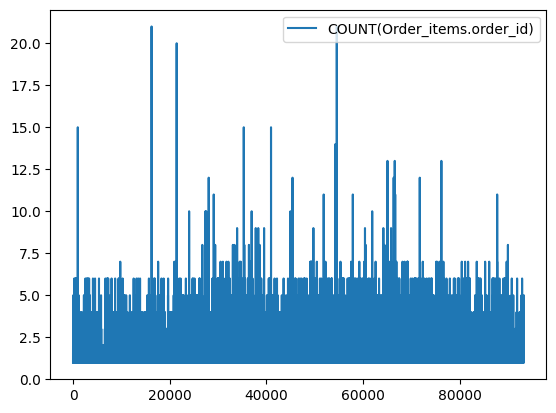

In [24]:
query = '''SELECT Order_items.shipping_limit_date, COUNT(Order_items.order_id)
            FROM Order_items
            INNER JOIN Orders ON Order_items.order_id = Orders.order_id
            GROUP BY Order_items.shipping_limit_date
            '''

db = pd.read_sql_query(sql = query, con = cn)
db.plot()

9. Вычислите суммарную выручку и число заказов в разрезе типов оплаты (поле payment_type).

In [25]:
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [26]:
query = '''SELECT Order_payments.payment_type, SUM(Order_items.price) , COUNT(Orders.order_id)
            FROM Order_payments
            INNER JOIN Orders ON Orders.order_id = Order_payments.order_id
            INNER JOIN Order_items ON Order_items.order_id = Orders.order_id
            GROUP BY Order_payments.payment_type
            '''

db = pd.read_sql_query(sql = query, con = cn)
db

,payment_type,SUM(Order_items.price),COUNT(Orders.order_id)
0,boleto,2.391526e+06,22867
1,credit_card,1.097436e+07,86769
2,debit_card,1.837587e+05,1691
3,voucher,6.594736e+05,6274


10. Определите среднию оценку (поле review_score) для заказов в зависимости от статуса заказа (order_status).

In [27]:
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [28]:
query = '''SELECT Orders.order_status, AVG(Order_reviews.review_score)
            FROM Orders
            INNER JOIN Order_reviews ON Order_reviews.order_id = Orders.order_id
            GROUP BY Orders.order_status
            '''

db = pd.read_sql_query(sql = query, con = cn)
db

,order_status,AVG(Order_reviews.review_score)
0,approved,2.500000
1,canceled,1.811166
2,created,2.333333
3,delivered,4.155717
4,invoiced,1.661342
5,processing,1.277027
6,shipped,2.008629
7,unavailable,1.530988
